<a href="https://colab.research.google.com/github/GitHubGetHope/Capteur-d-encrassement/blob/main/Projet_JtoDaSci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. « Data understanding » : Compréhension des données par des statistiques descriptives :
- Which attributes (columns) from the database seem most promising?
- Is there enough data to draw generalizable conclusions or make accurate predictions?
- Are you merging various data sources? If so, are there areas that might pose a problem when merging?
- Have you considered how missing values are handled in each of your data sources?
- Have you noted the size of all data sources?
- Are you able to use a subset of data where appropriate?
- Have you computed basic statistics for each attribute of interest? Did meaningful information emerge?
- Did you use exploratory graphics to gain further insight into key attributes? Did this insight reshape any of your
hypotheses?

2. Traduction du problème en tâches d'analyse
- Conclude on this preliminary phase
- Present a working plan
3. Focus sur la tâche «data preparation» :
- Merging data sets and/or records
- Selecting a sample subset of data
- Aggregating records
- Deriving new attributes
- Sorting the data for modeling
- Removing or replacing blank or missing values
- Splitting into training and test data sets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os.path as op
import seaborn as sns
import matplotlib.pyplot as p
import plotly.express as px
# Function to standardize the data 
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [ ]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, k=1)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

sns.set_style('darkgrid')
plt.rc('figure', figsize=[8, 6])

In [ ]:
# Read the datasets

# Online retail 
df_2010 = pd.read_excel(io='/content/drive/MyDrive/Colab Notebooks/JtoDaSci/online_retail_II.xlsx', sheet_name="Year 2009-2010")
df_2011 = pd.read_excel(io='/content/drive/MyDrive/Colab Notebooks/JtoDaSci/online_retail_II.xlsx', sheet_name="Year 2010-2011")

# Méteo 
df_meteo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/JtoDaSci/meteoUK.csv", encoding = "ISO-8859-1", delimiter = ",", decimal='.')

# Événements spéciaux 
df_even = pd.read_excel(io='/content/drive/MyDrive/Colab Notebooks/JtoDaSci/evenements.xlsx', sheet_name="Hoja1")


# Data Preparation

## Base de données : Retail Online


In [ ]:
df=df_2010.append(df_2011, ignore_index=True)

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df['TotalPrice']=df.apply(lambda x: abs(x['Price']*x['Quantity']), axis=1)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   TotalPrice   1067371 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 73.3+ MB


In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
TotalPrice          0
dtype: int64

In [ ]:
df_per_invoice=df.groupby(by=['Invoice']).size().count()
df_per_StockCode=df.groupby(by=['StockCode']).size().count()
df_per_description=df.groupby(by=['Description']).size().count()
df_per_Stock_description=df.groupby(by=['StockCode','Description']).size().count()
df_per_Country=df.groupby(by=['Country']).size().count()

In [ ]:
print('There are ',df_per_invoice,' invoice different')
print('There are ',df_per_StockCode,' stockcode different')
print('There are ',df_per_description,' description different')
print('There are ',df_per_Stock_description,' stockage + description different')
print('There are ',df_per_Country,' country different')

There are  53628  invoice different
There are  5305  stockcode different
There are  5698  description different
There are  6570  stockage + description different
There are  43  country different


In [ ]:
per_Country=df.groupby(by=['Country']).size()

In [ ]:
per_Country

Country
Australia                 1913
Austria                    938
Bahrain                    126
Belgium                   3123
Bermuda                     34
Brazil                      94
Canada                     228
Channel Islands           1664
Cyprus                    1176
Czech Republic              30
Denmark                    817
EIRE                     17866
European Community          61
Finland                   1049
France                   14330
Germany                  17624
Greece                     663
Hong Kong                  364
Iceland                    253
Israel                     371
Italy                     1534
Japan                      582
Korea                       63
Lebanon                     58
Lithuania                  189
Malta                      299
Netherlands               5140
Nigeria                     32
Norway                    1455
Poland                     535
Portugal                  2620
RSA                        169


In [ ]:
import plotly.express as px
import plotly.io as pio
fig = px.pie(df,  names='Country', title='Distribution de transaction par pays',width=900, height=700)
fig.update_traces(textposition='inside')
fig.show()

On peut voir que la plus part de données correspondent au Royaume-Uni, donc on a décidé de travailler que avec les données de United Kingdom. 

In [ ]:
df = df.loc[df["Country"] == 'United Kingdom']

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.4
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.6
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.0
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.8


In [ ]:
df.shape

(981330, 9)

In [ ]:
df_per_invoice=df.groupby(by=['Invoice']).size().count()
df_per_StockCode=df.groupby(by=['StockCode']).size().count()
df_per_description=df.groupby(by=['Description']).size().count()
df_per_Stock_description=df.groupby(by=['StockCode','Description']).size().count()
df_per_Country=df.groupby(by=['Country']).size().count()

In [ ]:
print('There are ',df_per_invoice,' invoice different')
print('There are ',df_per_StockCode,' stockcode different')
print('There are ',df_per_description,' description different')
print('There are ',df_per_Stock_description,' stockage + description different')
print('There are ',df_per_Country,' country different')

There are  49108  invoice different
There are  5303  stockcode different
There are  5668  description different
There are  6540  stockage + description different
There are  1  country different


In [ ]:
df.groupby(by=['StockCode','Description']).size()

StockCode     Description                       
10002         INFLATABLE POLITICAL GLOBE            334
10080         GROOVY CACTUS INFLATABLE               28
              check                                   1
10109         BENDY COLOUR PENCILS                    1
10120         DOGGY RUBBER                           75
                                                   ... 
gift_0001_40  Dotcomgiftshop Gift Voucher £40.00      5
gift_0001_50  Dotcomgiftshop Gift Voucher £50.00      6
gift_0001_70  Dotcomgiftshop Gift Voucher £70.00      1
gift_0001_80  Dotcomgiftshop Gift Voucher £80.00      2
m             Manual                                  5
Length: 6540, dtype: int64

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    240029
Country             0
TotalPrice          0
dtype: int64

In [ ]:
df[pd.isnull(df.Description)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom,0.0
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom,0.0
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom,0.0
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom,0.0
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,0.0
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,0.0
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,0.0
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0


La colonne de description présente les noms des produits stockés, ci-dessus on remarque qu'il y a 4382 valeurs nulles. Cependant, on va laisser cette colone pour pouvoir identifier les nom produits et comprendre les comportements des acheteurs. 

On va modifier le format de la colonne InvoiceDate pour la fusionner avec la BD méteo

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y%m%d').dt.normalize()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0
...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,23.4
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,23.6
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,30.0
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,214.8


## Base de données : Méteo

Pour la base de données méteo la seule colonne qui nous interes c'est la colonne TAVG : Témpérature Average. On va suprimer tous les autres colonnes et on va travailler avec les colonnes DATE et TAVG.

In [ ]:
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    761 non-null    object 
 1   LATITUDE   761 non-null    float64
 2   LONGITUDE  761 non-null    float64
 3   ELEVATION  761 non-null    float64
 4   DATE       761 non-null    object 
 5   PRCP       742 non-null    float64
 6   TAVG       761 non-null    int64  
 7   TMAX       604 non-null    float64
 8   TMIN       195 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 53.6+ KB


In [ ]:
df_meteo

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,UKM00003917,54.658,-6.216,81.7,2009-12-01,0.00,40,NaN,31.0
1,UKM00003917,54.658,-6.216,81.7,2009-12-02,0.32,44,49.0,NaN
2,UKM00003917,54.658,-6.216,81.7,2009-12-03,0.03,38,NaN,NaN
3,UKM00003917,54.658,-6.216,81.7,2009-12-04,0.00,40,NaN,32.0
4,UKM00003917,54.658,-6.216,81.7,2009-12-05,0.55,46,NaN,NaN
...,...,...,...,...,...,...,...,...,...
756,UKM00003917,54.658,-6.216,81.7,2011-12-27,0.16,46,NaN,43.0
757,UKM00003917,54.658,-6.216,81.7,2011-12-28,0.12,43,NaN,NaN
758,UKM00003917,54.658,-6.216,81.7,2011-12-29,0.24,42,45.0,39.0
759,UKM00003917,54.658,-6.216,81.7,2011-12-30,0.25,45,NaN,NaN


In [ ]:
df_meteo['DATE'] = pd.to_datetime(df_meteo['DATE'])

In [ ]:
df_meteo.dtypes

STATION              object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
PRCP                float64
TAVG                  int64
TMAX                float64
TMIN                float64
dtype: object

In [ ]:
df_meteo=df_meteo.drop(columns=['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION',  'PRCP', 'TMAX', 'TMIN'])

In [ ]:
df_meteo["TAVG"]=pd.Series([((val-32) * 5 / 9) for val in df_meteo["TAVG"]])

In [ ]:
df_meteo

,DATE,TAVG
0,2009-12-01,4.444444
1,2009-12-02,6.666667
2,2009-12-03,3.333333
3,2009-12-04,4.444444
4,2009-12-05,7.777778
...,...,...
756,2011-12-27,7.777778
757,2011-12-28,6.111111
758,2011-12-29,5.555556
759,2011-12-30,7.222222


## Base de données : Événements Spéciaux

In [ ]:
df_even

,DATE,EVENEMENT
0,2009-12-08,Feast of the Immaculate Conception
1,2009-12-12,First Day of Hanukkah
2,2009-12-18,Muharram/Islamic New Year
3,2009-12-19,Last day of Hanukkah
4,2009-12-21,December Solstice
...,...,...
169,2011-11-25,Christmas Day
170,2011-12-26,Boxing Day
171,2011-01-27,Bank Holiday
172,2011-12-28,Last day of Hanukkah


In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0
...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,23.4
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,23.6
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,30.0
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,214.8


# Fusion des sources de données

In [ ]:
df_merged = pd.merge(df, df_meteo,  how='left', left_on='InvoiceDate', right_on = 'DATE')
df_merged

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,DATE,TAVG
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,2009-12-01,4.444444
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,2009-12-01,4.444444
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,2009-12-01,4.444444
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,2009-12-01,4.444444
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,2009-12-01,4.444444
...,...,...,...,...,...,...,...,...,...,...,...
981325,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,23.4,2011-12-09,1.666667
981326,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,23.6,2011-12-09,1.666667
981327,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,30.0,2011-12-09,1.666667
981328,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,214.8,2011-12-09,1.666667


In [ ]:
df_merged=df_merged.drop(columns=['DATE'])
df_merged

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,4.444444
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,4.444444
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,4.444444
...,...,...,...,...,...,...,...,...,...,...
981325,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,23.4,1.666667
981326,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,23.6,1.666667
981327,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,30.0,1.666667
981328,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,214.8,1.666667


In [ ]:
df_per_invoice=df_merged.groupby(by=['Invoice']).size().count()
df_per_StockCode=df_merged.groupby(by=['StockCode']).size().count()
df_per_Country=df_merged.groupby(by=['Country']).size().count()

print('There are ',df_per_invoice,' invoice different')
print('There are ',df_per_StockCode,' stockcode different')
print('There are ',df_per_Country,' country different')

There are  49108  invoice different
There are  5303  stockcode different
There are  1  country different


In [ ]:
df_per_jour=df_even.groupby(by=['DATE']).size().count()
df_per_evenement=df_even.groupby(by=['EVENEMENT']).size().count()


print('There are ',df_per_jour,' jour different')
print('There are ',df_per_evenement,' evenement different')


There are  174  jour different
There are  99  evenement different


In [ ]:
data = pd.merge(df_merged, df_even,  how='left', left_on='InvoiceDate', right_on = 'DATE').drop(columns=['DATE'])
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG,EVENEMENT
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,4.444444,NaN
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,NaN
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,NaN
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,4.444444,NaN
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,4.444444,NaN
...,...,...,...,...,...,...,...,...,...,...,...
981325,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,23.4,1.666667,NaN
981326,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,23.6,1.666667,NaN
981327,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,30.0,1.666667,NaN
981328,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,214.8,1.666667,NaN


In [ ]:
data['EVENEMENT']= data['EVENEMENT'].fillna('Normal day')

In [ ]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG,EVENEMENT
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,4.444444,Normal day
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,Normal day
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,Normal day
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,4.444444,Normal day
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,4.444444,Normal day
...,...,...,...,...,...,...,...,...,...,...,...
981325,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,23.4,1.666667,Normal day
981326,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,23.6,1.666667,Normal day
981327,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,30.0,1.666667,Normal day
981328,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,214.8,1.666667,Normal day


# Descriptive statistics and visualisation

On va transformer le type de donnée de la colonne Customer ID à objet. Puis, on analysis les variables quantitatives et qualitatives séparément. 

In [ ]:
data['Customer ID'] = data['Customer ID'].astype(str) 
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
TotalPrice            float64
TAVG                  float64
EVENEMENT              object
dtype: object

In [ ]:
data.describe()

,Quantity,Price,TotalPrice,TAVG
count,981330.000000,981330.000000,981330.000000,981330.000000
mean,8.858259,4.537892,19.728449,8.372805
std,172.638944,126.743401,302.851001,5.346186
min,-80995.000000,-53594.360000,0.000000,-11.666667
25%,1.000000,1.250000,3.480000,4.444444
50%,3.000000,2.100000,8.500000,9.444444
75%,10.000000,4.150000,17.000000,12.777778
max,80995.000000,38970.000000,168469.600000,18.333333


In [ ]:
data.describe(include = 'object')

,Invoice,StockCode,Description,Customer ID,Country,EVENEMENT
count,981330,981330,976948,981330,981330,981330
unique,49108,5303,5668,5411,1,81
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,nan,United Kingdom,Normal day
freq,1350,5615,5704,240029,981330,773997


In [ ]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'TotalPrice', 'TAVG', 'EVENEMENT'],
      dtype='object')

In [ ]:
# FAIRE CA AVANT CORR

data.loc[data['EVENEMENT']=='Normal day', 'EVENEMENT']='0'
data.loc[data['EVENEMENT']!='0', 'EVENEMENT']='1'
data=pd.get_dummies(data, columns=["EVENEMENT"])
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG,EVENEMENT_0,EVENEMENT_1
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,4.444444,1,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,1,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,1,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,4.444444,1,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,4.444444,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
981325,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,23.4,1.666667,1,0
981326,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,23.6,1.666667,1,0
981327,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,30.0,1.666667,1,0
981328,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,214.8,1.666667,1,0


In [ ]:
var_quant=['Quantity', 'TotalPrice', 'TAVG','EVENEMENT_0','EVENEMENT_1']
var_non_quant=['Invoice', 'StockCode', 'InvoiceDate', 'Customer ID', 'Country','Description']
data_quant= data.drop(columns=var_non_quant)
data_non_quant= data.drop(columns=var_quant)

In [ ]:
## Standarisation 
X = data_quant.values
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
np.mean(X_scaled, axis=0), np.var(X_scaled, axis=0)

(array([ 5.64767544e-19, -1.78046589e-17, -1.62189654e-18, -5.19006892e-16,
         6.67294575e-17, -6.67294575e-17]), array([1., 1., 1., 1., 1., 1.]))

In [ ]:
data_quant_scaled=pd.DataFrame(scale(data_quant),columns=data_quant.columns,index=data_quant.index)
corr=data_quant_scaled.corr()
corr

,Quantity,Price,TotalPrice,TAVG,EVENEMENT_0,EVENEMENT_1
Quantity,1.000000,-0.001074,0.031160,0.003334,0.002332,-0.002332
Price,-0.001074,1.000000,0.069919,-0.004060,0.001390,-0.001390
TotalPrice,0.031160,0.069919,1.000000,-0.001608,0.002978,-0.002978
TAVG,0.003334,-0.004060,-0.001608,1.000000,0.091441,-0.091441
EVENEMENT_0,0.002332,0.001390,0.002978,0.091441,1.000000,-1.000000
EVENEMENT_1,-0.002332,-0.001390,-0.002978,-0.091441,-1.000000,1.000000


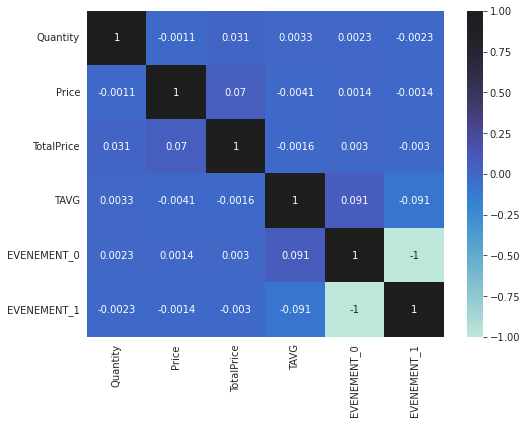

In [ ]:
sns.heatmap(data_quant_scaled.corr(), annot=True,center=1)

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG,EVENEMENT_0,EVENEMENT_1
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,4.444444,1,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,1,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,1,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,4.444444,1,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,4.444444,1,0


In [ ]:
corr2=data.corr()
corr2

,Quantity,Price,TotalPrice,TAVG,EVENEMENT_0,EVENEMENT_1
Quantity,1.000000,-0.001074,0.031160,0.003334,0.002332,-0.002332
Price,-0.001074,1.000000,0.069919,-0.004060,0.001390,-0.001390
TotalPrice,0.031160,0.069919,1.000000,-0.001608,0.002978,-0.002978
TAVG,0.003334,-0.004060,-0.001608,1.000000,0.091441,-0.091441
EVENEMENT_0,0.002332,0.001390,0.002978,0.091441,1.000000,-1.000000
EVENEMENT_1,-0.002332,-0.001390,-0.002978,-0.091441,-1.000000,1.000000


In [ ]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG,EVENEMENT_0,EVENEMENT_1
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,4.444444,1,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,1,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,1,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,4.444444,1,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,4.444444,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
981325,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,23.4,1.666667,1,0
981326,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,23.6,1.666667,1,0
981327,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,30.0,1.666667,1,0
981328,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,214.8,1.666667,1,0


In [ ]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



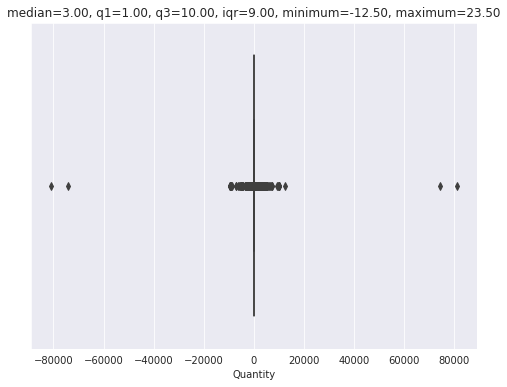

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



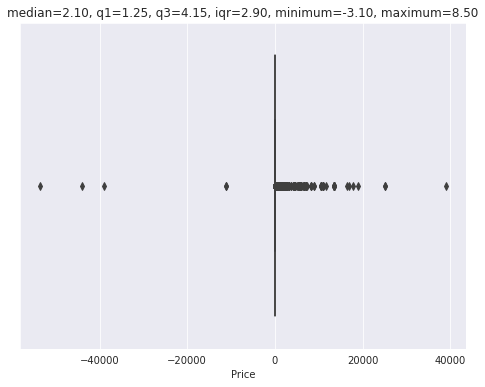

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



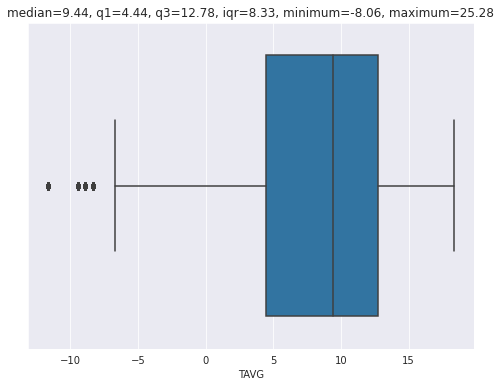

In [ ]:
box_and_whisker(data, 'Quantity')
box_and_whisker(data, 'Price')
box_and_whisker(data, 'TAVG')

Avec les boîtes à moustaches des variables, Quantité, Prix et TAVG, nous identifions qu'il y a des valeurs aberrantes dans notre ensemble de données. Cependant, ces valeurs correspondent aux retours de produits donc on ne va pas les supprimer.  

In [ ]:
qt_max=data['Quantity'].max()
data.loc[data['Quantity']==qt_max]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG,EVENEMENT_0,EVENEMENT_1
979957,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.6,1.666667,1,0


In [ ]:
data[data['Description']== 'PAPER CRAFT , LITTLE BIRDIE' ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG,EVENEMENT_0,EVENEMENT_1
979957,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.6,1.666667,1,0
979958,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09,2.08,16446.0,United Kingdom,168469.6,1.666667,1,0


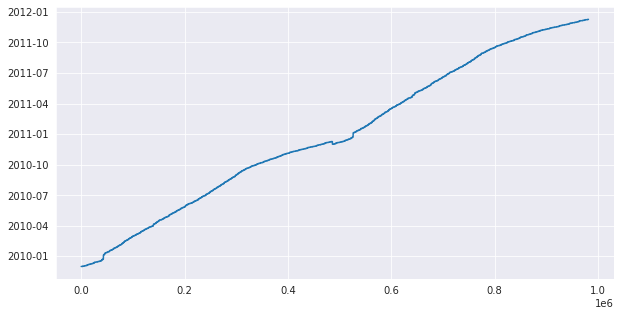

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
plt.plot(data['InvoiceDate'])

In [ ]:
!pip install git+https://github.com/statsmodels/statsmodels.git

  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-t3garlbe
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-t3garlbe
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.14.0.dev0+74.g6d7d42eae-cp37-cp37m-linux_x86_64.whl size=17856761 sha256=58c6d1da288641f8be138bdf04ccf3c6793bd31e47a4b79703aaa4eb51a20add
  Stored in directory: /tmp/pip-ephem-wheel-cache-hyvqjf_6/wheels/5c/ab/d8/d9505a18dd992621edd24cfddb9a1bd694dee85c065c0a6e57
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.seasonal import STL
result = STL(data['Invoice Date']).fit()
chart = result.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ImportError: ignored

# Strategie de fouille de données 

## Comprendre le comportement des acheteurs
Posons-nous quelques questions pour comprendre les tendances:


### Quelle est la plus grande quantité achetée entre decembre 2009 et decembre 2011 ?

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG,EVENEMENT_0,EVENEMENT_1
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,4.444444,1,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,1,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,1,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,4.444444,1,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,4.444444,1,0


In [ ]:
data['Month']=data['InvoiceDate'].dt.month
data['Year']=data['InvoiceDate'].dt.year
data['Day']=data['InvoiceDate'].dt.day
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG,EVENEMENT_0,EVENEMENT_1,Month,Year,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,4.444444,1,0,12,2009,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,1,0,12,2009,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,4.444444,1,0,12,2009,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,4.444444,1,0,12,2009,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,4.444444,1,0,12,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981325,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,23.4,1.666667,1,0,12,2011,9
981326,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,23.6,1.666667,1,0,12,2011,9
981327,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,30.0,1.666667,1,0,12,2011,9
981328,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,214.8,1.666667,1,0,12,2011,9


In [ ]:
#data['InvoiceDate'].dt.month
df_qt=data['Quantity'].groupby([data.Year, data.Month, data.StockCode]).agg('sum').reset_index()

In [ ]:
df_qt_12=df_qt[df_qt['Month']==12].sort_values(by ='Quantity', ascending= False)
df_qt_12

,Year,Month,StockCode,Quantity
35705,2010,12,84077,8330
66457,2011,12,22197,6002
2754,2009,12,85123A,5551
1057,2009,12,21980,5291
1050,2009,12,21967,5247
...,...,...,...,...
52,2009,12,18010,-715
34064,2010,12,20956,-739
2388,2009,12,79323GR,-818
1420,2009,12,35956,-1043


In [ ]:
df_qt_12[df_qt_12['StockCode']==84077]

,Year,Month,StockCode,Quantity
35705,2010,12,84077,8330
1639,2009,12,84077,2415
67693,2011,12,84077,1319


In [ ]:
data[data['StockCode']==84077]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TAVG,EVENEMENT_0,EVENEMENT_1,Month,Year,Day
1118,489561,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2009-12-01,0.21,14654.0,United Kingdom,10.08,4.444444,1,0,12,2009,1
3273,489723,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2009-12-02,0.18,14299.0,United Kingdom,51.84,6.666667,1,0,12,2009,2
3917,489802,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,3,2009-12-02,0.21,15581.0,United Kingdom,0.63,6.666667,1,0,12,2009,2
4256,489816,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2009-12-02,0.21,16086.0,United Kingdom,10.08,6.666667,1,0,12,2009,2
4268,489819,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,96,2009-12-02,0.21,14739.0,United Kingdom,20.16,6.666667,1,0,12,2009,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974038,581129,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-07,0.29,15498.0,United Kingdom,13.92,3.888889,1,0,12,2011,7
977926,581403,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-08,0.29,13510.0,United Kingdom,13.92,5.555556,0,1,12,2011,8
978519,581419,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2011-12-08,0.21,15484.0,United Kingdom,60.48,5.555556,0,1,12,2011,8
979903,581478,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-09,0.29,17364.0,United Kingdom,13.92,1.666667,1,0,12,2011,9


In [ ]:
df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01,4.25,17592.0,United Kingdom,12.75
197,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01,4.25,17592.0,United Kingdom,12.75
198,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01,4.25,17592.0,United Kingdom,12.75
199,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01,4.25,17592.0,United Kingdom,12.75
200,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01,4.25,17592.0,United Kingdom,12.75
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom,9.13
1067002,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom,224.69
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom,54.75
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315.0,United Kingdom,1.25


On a la plus grand quantité vendue est enregistrée le 09 decembre 2011. En observant la description, on peut dire que ça concerne les préparatifs de Noel 

In [ ]:
df = df.loc[df['Description'] != 'PAPER CRAFT , LITTLE BIRDIE']

In [ ]:
qt_max=df['Quantity'].max()
df.loc[df['Quantity']==qt_max]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.6


In [ ]:
df[df['Description']== 'MEDIUM CERAMIC TOP STORAGE JAR' ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.60
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18,1.04,12346.0,United Kingdom,77183.60
712657,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-05-12,1.25,16745.0,United Kingdom,5.00
713179,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,2011-05-12,1.25,14651.0,United Kingdom,6.25
713329,553009,23166,MEDIUM CERAMIC TOP STORAGE JAR,3,2011-05-12,1.25,13601.0,United Kingdom,3.75
...,...,...,...,...,...,...,...,...,...
1058287,580997,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-12-06,1.25,15023.0,United Kingdom,5.00
1059203,581108,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-07,1.25,15984.0,United Kingdom,2.50
1061709,581219,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,2011-12-08,2.46,NaN,United Kingdom,2.46
1065237,581439,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-08,2.46,NaN,United Kingdom,4.92


### Quel est l'article le plus acheté  ?

In [ ]:
df.groupby(by=['StockCode']).size().sort_values(ascending = False)

StockCode
85123A    5615
85099B    3930
22423     3876
20725     2941
21212     2895
          ... 
21183        1
21182        1
21177        1
21176        1
17013E       1
Length: 5302, dtype: int64

### A quelle période on a le plus grand nombre d'achats ? 

### Quels sont les produits les moins vendus ?

### Quelle période on a le moindre achats ?

## Decision Trees

In [ ]:
from sklearn import datasets
from random import shuffle
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'TotalPrice', 'TAVG', 'EVENEMENT_0',
       'EVENEMENT_1', 'Month', 'Year', 'Day'],
      dtype='object')

In [ ]:
training_data, testing_data = train_test_split(data, test_size=0.2, random_state=25)

In [ ]:
# Separate data between training set and test set
#train_X=training_data[['Invoice', 'StockCode', 'InvoiceDate', 'Price','Customer ID', 'Country', 'TAVG', 'EVENEMENT']]
train_X=training_data[['Price','TAVG']]
train_Y=training_data[['Quantity']]

#test_X=testing_data[['Invoice', 'StockCode', 'InvoiceDate', 'Price','Customer ID', 'Country', 'TAVG', 'EVENEMENT']]
test_X=testing_data[['Price','TAVG']]
test_Y=testing_data[['Quantity']]

In [ ]:
print(train_X.shape)
print(test_Y.shape)

(785064, 2)
(196266, 1)


In [ ]:
from sklearn import metrics
def DT(crit,max_depth,min_samples_split,min_samples_leaf, train_X,train_y,test_X,test_y):
    clf = tree.DecisionTreeClassifier(criterion = crit, max_depth = max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    clf = clf.fit(train_X, train_y)
    dot_data = tree.export_graphviz(clf, out_file=None,
                feature_names=train_X.columns,
                filled=True, rounded=True,
                special_characters=True)
    
    # Evaluates the training onto the test set
    clf.fit(train_X,train_y)
    scr=clf.score(test_X,test_y) 

    # Confusion matrix
    y_pred = clf.predict(test_X)
    cm=confusion_matrix(test_y,y_pred )
    RMSE = metrics.mean_absolute_error(test_y, y_pred)
    return scr, RMSE, dot_data

In [ ]:
scr, RMSE, dot_data = DT('gini',6,3,1,train_X,train_Y,test_X,test_Y)
print(scr,RMSE)

0.32676062079015217 8.820641374461191
